In [980]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix, accuracy_score, roc_curve, roc_auc_score)
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

data = pd.read_csv("train.csv")
cols = data.drop(columns=["quality","Id"]).columns
testData = pd.read_csv("test.csv")
data

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8
2054,2054,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5,5


In [981]:
data.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


##### Analysis Before Cleaning

<AxesSubplot:>

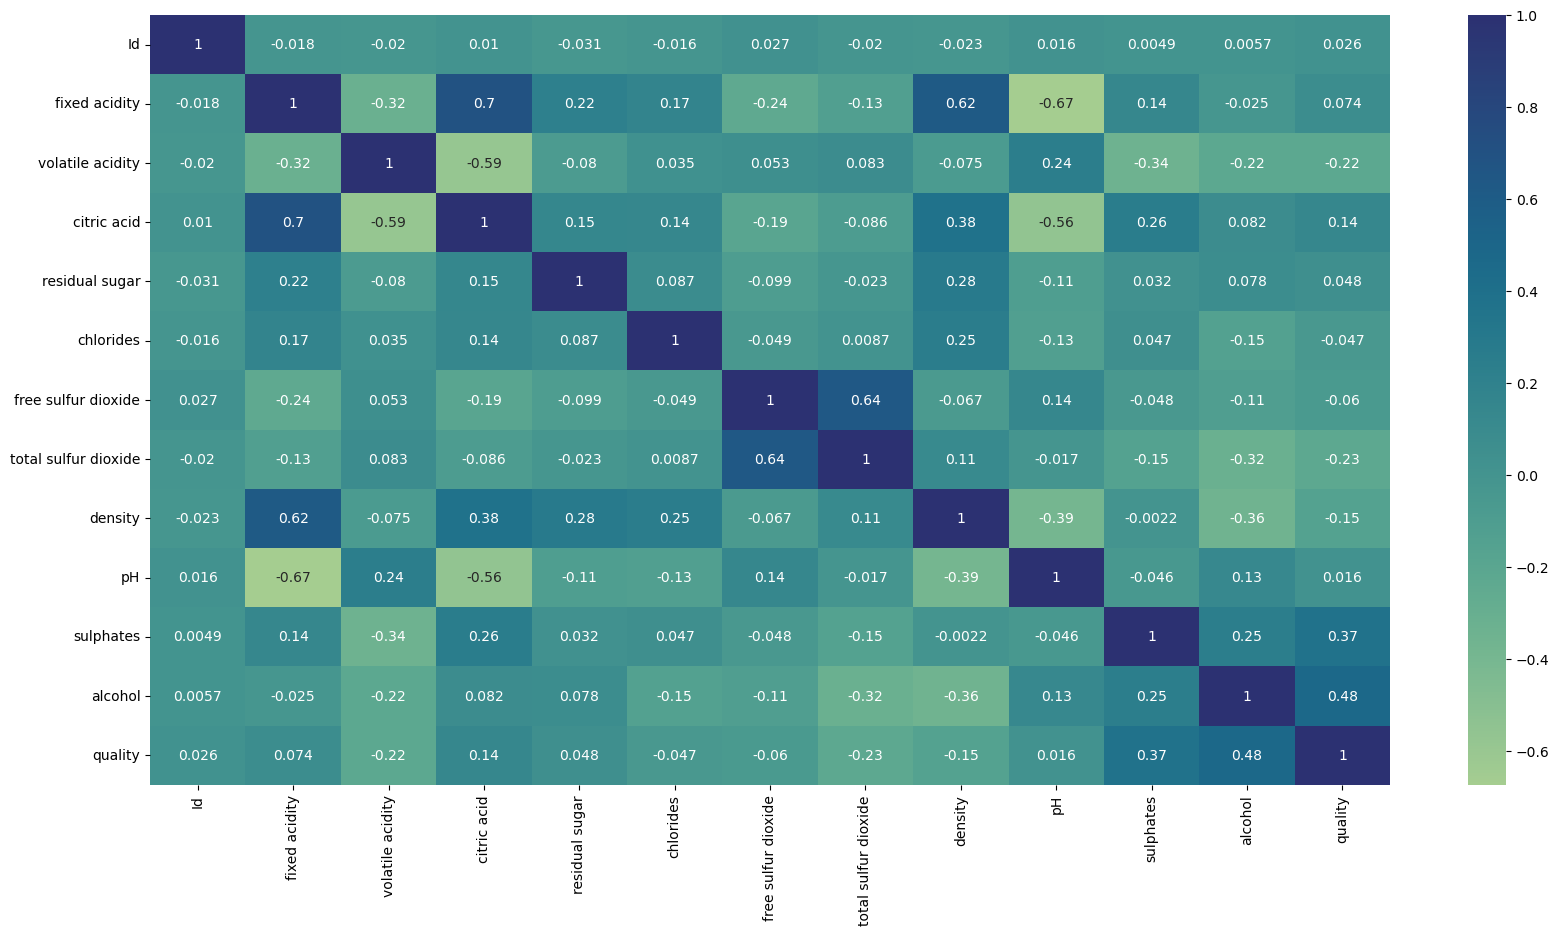

In [982]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), cmap="crest", annot=True, ax=ax)

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

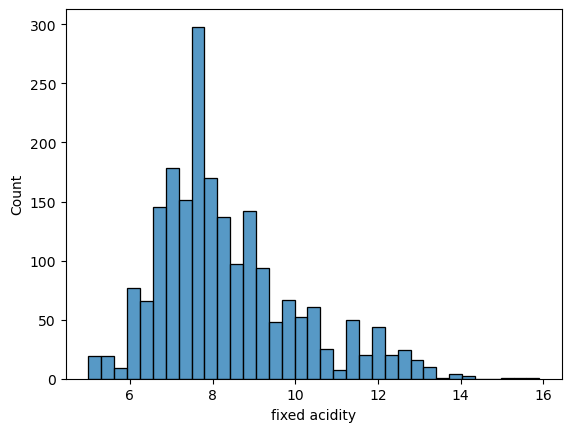

In [983]:
sns.histplot(data.iloc[:,1])

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

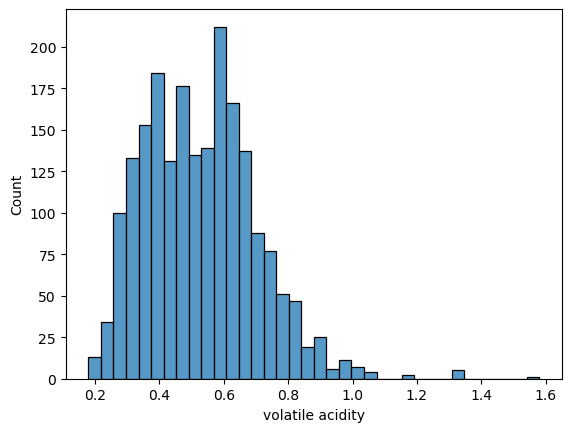

In [984]:
sns.histplot(data.iloc[:,2])

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

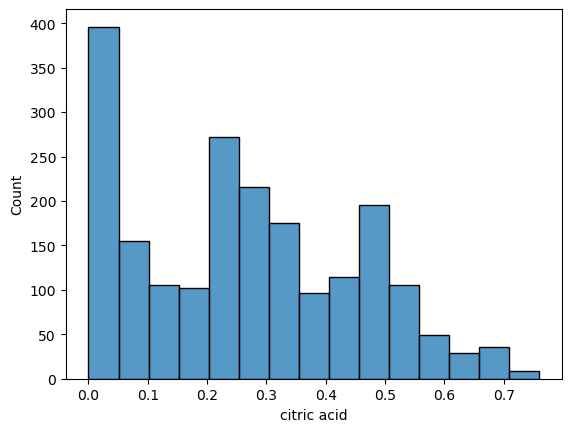

In [985]:
sns.histplot(data.iloc[:,3])

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

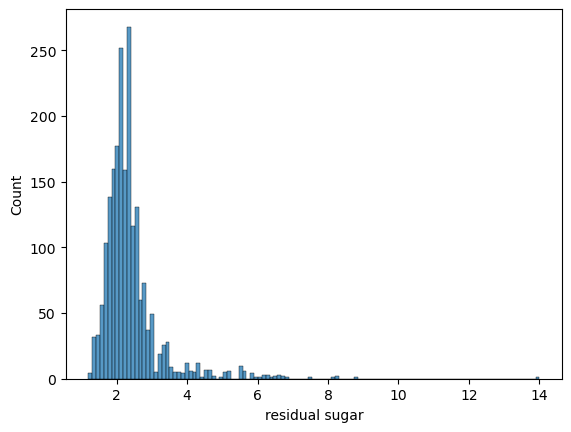

In [986]:
sns.histplot(data.iloc[:,4])

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

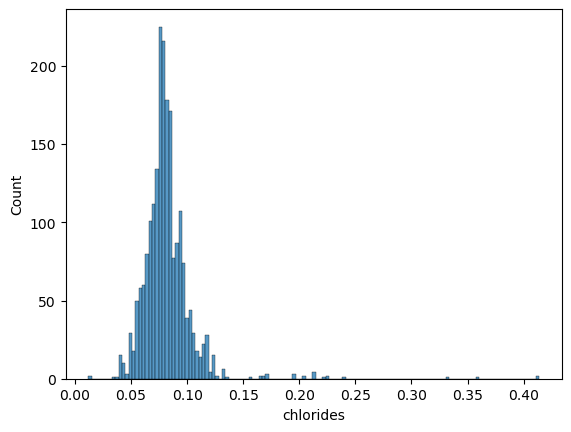

In [987]:
sns.histplot(data.iloc[:,5])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

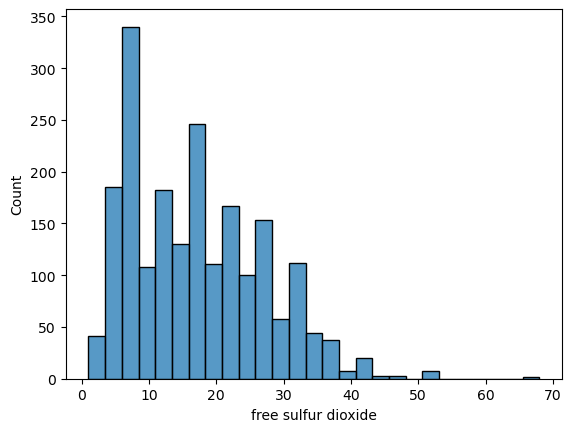

In [988]:
sns.histplot(data.iloc[:,6])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

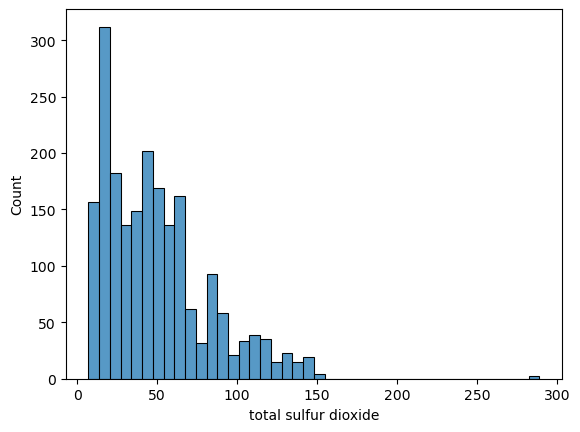

In [989]:
sns.histplot(data.iloc[:,7])

<AxesSubplot:xlabel='density', ylabel='Count'>

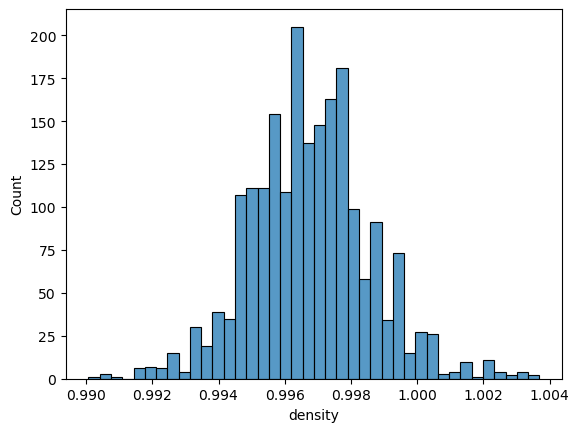

In [990]:
sns.histplot(data.iloc[:,8])

<AxesSubplot:xlabel='pH', ylabel='Count'>

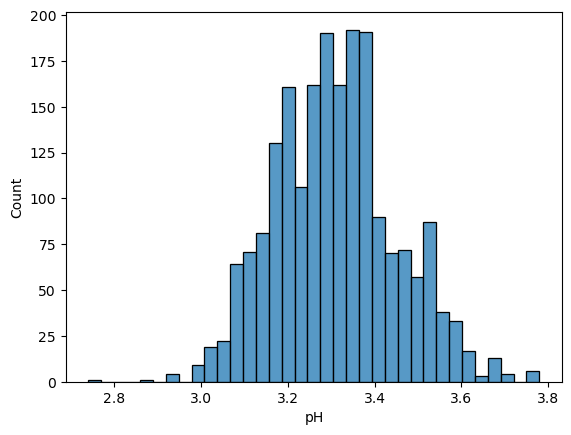

In [991]:
sns.histplot(data.iloc[:,9])

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

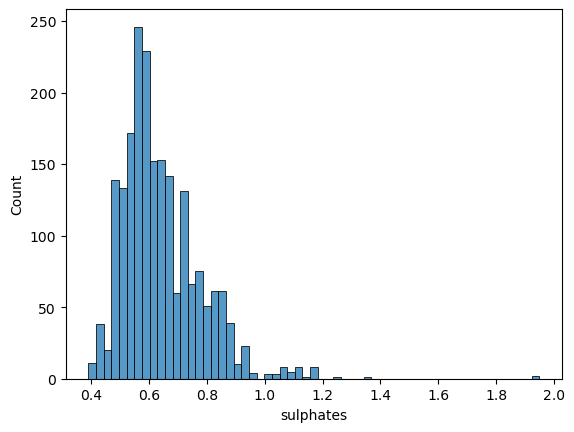

In [992]:
sns.histplot(data.iloc[:,10])

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

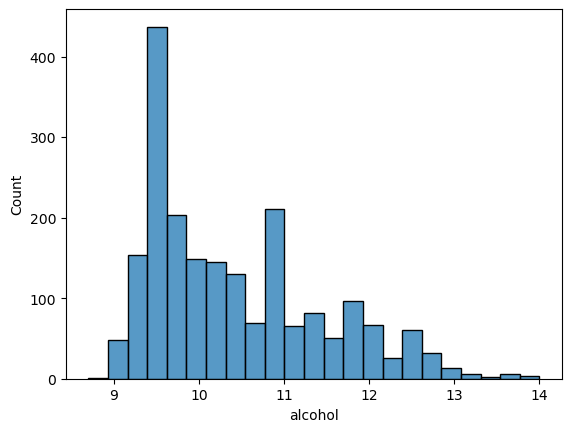

In [993]:
sns.histplot(data.iloc[:,11])

<AxesSubplot:xlabel='quality', ylabel='Count'>

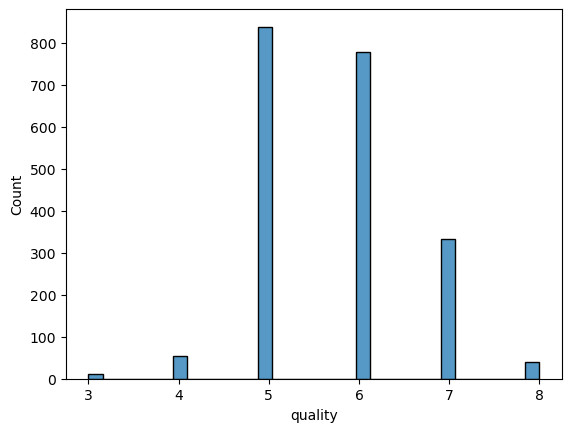

In [994]:
sns.histplot(data.iloc[:,12])

#### Data Cleaning
Ramesh you should try running the thing i put cuz it looks at the pairs and compares accuracies

#### Duplicates

All the duplicates in the data are

In [995]:
data[data.duplicated()]

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [996]:
data = data.drop_duplicates()
data[data.duplicated()]

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


#### Delete Extreme Outliers

In [997]:
# Define acceptable ranges for each feature
# OLD RANGES
# acceptable_ranges = {
#     'fixed acidity': (4, 15),
#     'volatile acidity': (0, 1.5),
#     'citric acid': (0, 1),
#     'residual sugar': (0, 20),
#     'chlorides': (0, 0.5),
#     'free sulfur dioxide': (0, 75),
#     'total sulfur dioxide': (0, 200),
#     'density': (0.98, 1.005),
#     'pH': (2.5, 4),
#     'sulphates': (0, 2),
#     'alcohol': (8, 16)
# }

# POSSIBLE RANGE ???
# acceptable_ranges = {
#     'fixed acidity': (0, 14),
#     'volatile acidity': (0, 2), 
#     'citric acid': (0, 1),
#     'residual sugar': (0, 45),
#     'chlorides': (0, 0.6),
#     'free sulfur dioxide': (0, 300),
#     'total sulfur dioxide': (0, 500),
#     'density': (0, 2),
#     'pH': (0, 14),
#     'sulphates': (0, 2),
#     'alcohol': (0, 20)
# }

acceptable_ranges = {
    'fixed acidity': (0, 14),
    'volatile acidity': (0, 1.2), 
    'citric acid': (0, 1),
    'residual sugar': (0, 7),
    'chlorides': (0, 0.2),
    'free sulfur dioxide': (0, 55),
    'total sulfur dioxide': (0, 200),
    'density': (0, 2),
    'pH': (2, 5),
    'sulphates': (0, 1.6),
    'alcohol': (0, 20)
}

# Remove rows outside of the acceptable ranges
for feature in acceptable_ranges:
    min_val, max_val = acceptable_ranges[feature]
    data = data[(data[feature] >= min_val) & (data[feature] <= max_val)]
    

#### Impude Remaining Outliers with Median (Using Interquartile or Z-Score Methods)

In [998]:
# Define a function to replace outliers with the median
def replace_outliers_with_median(df, feature, target):
    # Calculate the first and third quartiles
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate the upper and lower bounds for outliers
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    # Replace the outliers with the median value for that target group
    for t in df[target].unique():
        median = df.loc[df[target]==t, feature].median()
        df.loc[(df[target]==t) & ((df[feature] < lower_bound) | (df[feature] > upper_bound)), feature] = median


In [999]:
from scipy import stats
def removeOutliersUsingZScore(df):
    # identify rows with outlier values (threshold of 3 standard deviations)
    outlier_threshold = 3
    # calculate z-scores for each column in the dataframe
    z_scores = np.abs(stats.zscore(df))

    # replace outlier values with median value for each column
    for i in range(len(df.columns)):
        column = df.iloc[:, i]
        median = column.median()
        column[z_scores[:, i] > outlier_threshold] = median

    # check for remaining outlier values and remove corresponding rows
    outlier_rows = np.where(z_scores > outlier_threshold)
    df_cleaned = df[(z_scores < outlier_threshold).all(axis=1)]


In [1000]:
# Replace outliers with the median for each feature and outcome group
for feature in cols:
    replace_outliers_with_median(data, feature, 'quality')

<AxesSubplot:xlabel='pH', ylabel='Count'>

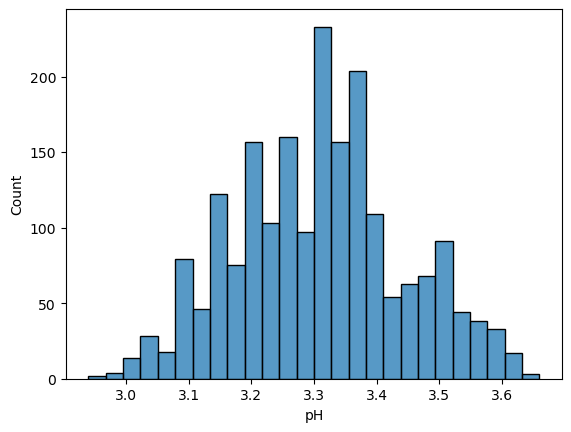

In [1001]:
sns.histplot(data.iloc[:,9])

#### Feature Addition

In [1002]:
# fixed acidity and citric acid
data["Ratio"] = data["alcohol"]/data["sulphates"]
# data = data.drop(columns=["alcohol", "sulphates"])
data

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Ratio,Ratio2
0,0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6,15.714286,0.350000
1,1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6,19.104478,0.291304
2,2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7,15.479452,0.347619
3,3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5,18.490566,0.203846
4,4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,0.64,9.5,6,14.843750,0.278261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7,13.793103,0.435000
2052,2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5,16.206897,0.322222
2053,2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8,16.233766,0.452941
2054,2054,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5,5,22.619048,0.240000


#### Normalization

In [1003]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Select the columns to be scaled
cols_to_scale = data.drop(columns=["quality","Id"]).columns
# Apply the scaler to the selected columns
scaler.fit(data[cols_to_scale])
data[cols_to_scale] = scaler.transform(data[cols_to_scale])
# testData[cols_to_scale] = scaler.transform(testData[cols_to_scale])

# Print the normalized data
print(data)


        Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0       0.428571          0.384615     0.513158        0.408163   
1        1       0.614286          0.144231     0.960526        0.448980   
2        2       0.300000          0.396635     0.039474        0.367347   
3        3       0.442857          0.829327     0.289474        0.571429   
4        4       0.500000          0.216346     0.394737        0.448980   
...    ...            ...               ...          ...             ...   
2051  2051       0.228571          0.156250     0.171053        0.326531   
2052  2052       0.671429          0.492788     0.276316        0.244898   
2053  2053       0.385714          0.300481     0.552632        0.204082   
2054  2054       0.585714          0.384615     0.000000        0.224490   
2055  2055       0.171429          0.156250     0.236842        0.448980   

      chlorides  free sulfur dioxide  total sulfur dioxide   density  \
0      0.402778

#### Evaluate With Different Classifiers

#### KNN

In [1004]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test = train_test_split(df_train[cols_to_scale], df_train["quality"], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_scale], data['quality'], test_size=0.2, random_state=42)

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the quality of wine in the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test,y_pred))


Accuracy: 0.5272277227722773
[[  0   0   4   1   0   0]
 [  0   0   7   2   0   0]
 [  0   0 126  40   4   0]
 [  0   1  54  72  16   0]
 [  0   0  14  39  15   0]
 [  0   0   1   6   2   0]]


c:\Users\Rames\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Random Forest

In [1005]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Ratio,Ratio2
763,0.157143,0.492788,0.000000,0.163265,0.416667,0.148936,0.098361,0.410405,0.722222,0.370370,0.111111,0.268837,0.405565
1409,0.257143,0.793269,0.039474,0.163265,0.138889,0.361702,0.344262,0.398844,0.583333,0.314815,0.444444,0.441043,0.372681
246,0.185714,0.180288,0.328947,0.285714,0.083333,0.276596,0.311475,0.329480,0.611111,0.259259,0.555556,0.540279,0.248070
1678,0.514286,0.408654,0.328947,0.408163,0.458333,0.382979,0.467213,0.539884,0.291667,0.370370,0.311111,0.343593,0.229189
1490,0.500000,0.108173,0.460526,0.204082,0.416667,0.234043,0.467213,0.630058,0.652778,0.462963,0.111111,0.209136,0.419105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,0.557143,0.168269,0.723684,0.408163,0.763889,0.106383,0.057377,0.378035,0.583333,0.851852,0.533333,0.144634,0.436456
1319,0.600000,0.276442,0.421053,0.367347,0.666667,0.382979,0.483607,0.576879,0.472222,0.481481,0.200000,0.228456,0.301694
881,0.385714,0.721154,0.131579,0.408163,0.555556,0.042553,0.065574,0.687861,0.750000,0.259259,0.177778,0.383087,0.181358
1489,0.257143,0.552885,0.000000,0.285714,0.194444,0.276596,0.172131,0.026590,0.736111,0.444444,0.422222,0.329222,0.340375


In [1006]:
rf = RandomForestClassifier(n_estimators=1500, random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = rf.score(X_test, y_test)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.6064356435643564
[[  0   0   3   2   0   0]
 [  0   0   9   0   0   0]
 [  0   0 125  43   2   0]
 [  0   0  30 102  11   0]
 [  0   0   9  41  18   0]
 [  0   0   1   6   2   0]]


<AxesSubplot:ylabel='Count'>

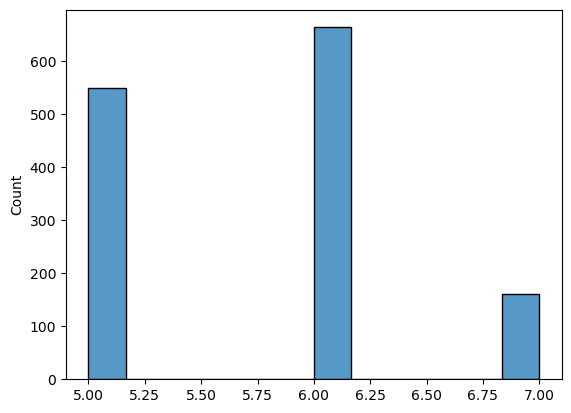

In [683]:
test_pred = rf.predict(testData[cols_to_scale])
len(test_pred)
output = pd.DataFrame({"Id": testData["Id"],"quality": test_pred})
output.to_csv("rf_output.csv",index=False)
sns.histplot(test_pred)
# sns.histplot(y_pred)
# sns.histplot(data["quality"])


#### SVM

In [437]:
# from sklearn.svm import SVC
# # Create an SVM classifier object
# svm = SVC(kernel='linear', C=1, random_state=42)

# # Fit the classifier to the training data
# svm.fit(X_train, y_train)

# # Predict the classes of the test data
# y_pred = svm.predict(X_test)
# accuracy = svm.score(X_test, y_test)
# print('Accuracy:', accuracy)
# print(confusion_matrix(y_test,y_pred))

Accuracy: 0.5668316831683168
[[  0   0   4   1   0   0]
 [  0   0   9   0   0   0]
 [  0   0 134  36   0   0]
 [  0   0  48  95   0   0]
 [  0   0  12  56   0   0]
 [  0   0   1   8   0   0]]


Test Model on Test Data

In [438]:
# Create a DataFrame with the predicted wine quality test data
test_pred_df = pd.DataFrame(test_pred, columns=['id','predicted_quality'])

# Write the DataFrame to a CSV file
test_pred_df.to_csv('predicted_quality.csv', index=False)


ValueError: Shape of passed values is (1372, 1), indices imply (1372, 2)

#### Finding Pairs with High Correlation - Feature Engineering

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier

# Load the dataset
# data = pd.read_csv('wine_quality.csv')

# Split the data into training and test sets
# X = data.iloc[:, 1:-1]
# y = data.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

import itertools

# Create all possible pairs of features
feature_pairs = list(itertools.combinations(X_train.columns, 2))

# Train a random forest model for each feature pair and record the accuracy
accuracies = {}
for pair in feature_pairs:
    # Train a random forest model with only the current pair of features
    X_train_pair = X_train[list(pair)]
    X_test_pair = X_test[list(pair)]
    rf_pair = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_pair.fit(X_train_pair, y_train)
    y_pred_pair = rf_pair.predict(X_test_pair)
    accuracy_pair = accuracy_score(y_test, y_pred_pair)
    accuracies[pair] = accuracy_pair

# Evaluate the accuracy of each feature pair and print the results
best_pair = None
best_accuracy = 0
for pair, accuracy in accuracies.items():
    print(f"Features: {pair}, Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_pair = pair
        best_accuracy = accuracy

print(f"\nBest pair: {best_pair}, Accuracy: {best_accuracy}")


"""
# Define a list of feature pairs to compare
feature_pairs = [('fixed acidity', 'volatile acidity'), ('fixed acidity', 'citric acid'), ('fixed acidity', 'residual sugar'),
                 ('fixed acidity', 'chlorides'), ('fixed acidity', 'free sulfur dioxide'), ('fixed acidity', 'total sulfur dioxide'),
                 ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('fixed acidity', 'sulphates'), ('fixed acidity', 'alcohol'),
                 ('volatile acidity', 'citric acid'), ('volatile acidity', 'residual sugar'), ('volatile acidity', 'chlorides'),
                 ('volatile acidity', 'free sulfur dioxide'), ('volatile acidity', 'total sulfur dioxide'), ('volatile acidity', 'density'),
                 ('volatile acidity', 'pH'), ('volatile acidity', 'sulphates'), ('volatile acidity', 'alcohol'),
                 ('citric acid', 'residual sugar'), ('citric acid', 'chlorides'), ('citric acid', 'free sulfur dioxide'),
                 ('citric acid', 'total sulfur dioxide'), ('citric acid', 'density'), ('citric acid', 'pH'), ('citric acid', 'sulphates'),
                 ('citric acid', 'alcohol'), ('residual sugar', 'chlorides'), ('residual sugar', 'free sulfur dioxide'),
                 ('residual sugar', 'total sulfur dioxide'), ('residual sugar', 'density'), ('residual sugar', 'pH'),
                 ('residual sugar', 'sulphates'), ('residual sugar', 'alcohol'), ('chlorides', 'free sulfur dioxide'),
                 ('chlorides', 'total sulfur dioxide'), ('chlorides', 'density'), ('chlorides', 'pH'), ('chlorides', 'sulphates'),
                 ('chlorides', 'alcohol'), ('free sulfur dioxide', 'total sulfur dioxide'), ('free sulfur dioxide', 'density'),
                 ('free sulfur dioxide', 'pH'), ('free sulfur dioxide', 'sulphates'), ('free sulfur dioxide', 'alcohol'),
                 ('total sulfur dioxide', 'density'), ('total sulfur dioxide', 'pH'), ('total sulfur dioxide', 'sulphates'),
                 ('total sulfur dioxide', 'alcohol'), ('density', 'pH'), ('density', 'sulphates'), ('density', 'alcohol'),
                 ('pH', 'sulphates'), ('pH', 'alcohol'), ('sulphates', 'alcohol')]

# Define a function to train and evaluate a random forest classifier on a given pair of features
def evaluate_feature_pair(feature_pair):
    X_train_pair = X_train[list(feature_pair)]
    X_test_pair = X_test[list(feature_pair)]
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_pair, y_train)
    accuracy = clf.score(X_test_pair, y_test)
    return accuracy
"""


NameError: name 'RandomForestClassifier' is not defined